<h1><b><center>Salary Analysis and Prediction</center></b></h1><br><br>

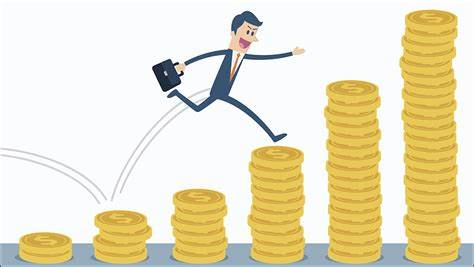


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
df.shape

(62642, 29)

In [5]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [6]:
df.level.value_counts()

L4                             5014
L5                             4871
L3                             3337
L6                             2871
Senior Software Engineer       1443
                               ... 
Mid Market                        1
Gr 7                              1
Senior BA                         1
Consulting Analyst                1
Bioinformatics Scientist II       1
Name: level, Length: 2923, dtype: int64

In [7]:
df.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [8]:
df.Education.value_counts()

Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64

In [9]:
df.Doctorate_Degree.value_counts()

0    60839
1     1803
Name: Doctorate_Degree, dtype: int64

In [10]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
corrM=df[["totalyearlycompensation","yearsofexperience","yearsatcompany","Masters_Degree","Bachelors_Degree","Doctorate_Degree","Highschool","Some_College","gender"]].corr()

In [12]:
corrM.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
totalyearlycompensation,1.000000,0.422879,0.165802,0.018320,-0.139866,0.097179,-0.014831,-0.003380
yearsofexperience,0.422879,1.000000,0.522611,0.060310,-0.069468,-0.005380,0.011605,0.037925
yearsatcompany,0.165802,0.522611,1.000000,0.026109,-0.027487,0.001165,-0.005947,0.005718
Masters_Degree,0.018320,0.060310,0.026109,1.000000,-0.286083,-0.076072,-0.040896,-0.043087
Bachelors_Degree,-0.139866,-0.069468,-0.027487,-0.286083,1.000000,-0.086404,-0.035965,-0.037891


<Axes: >

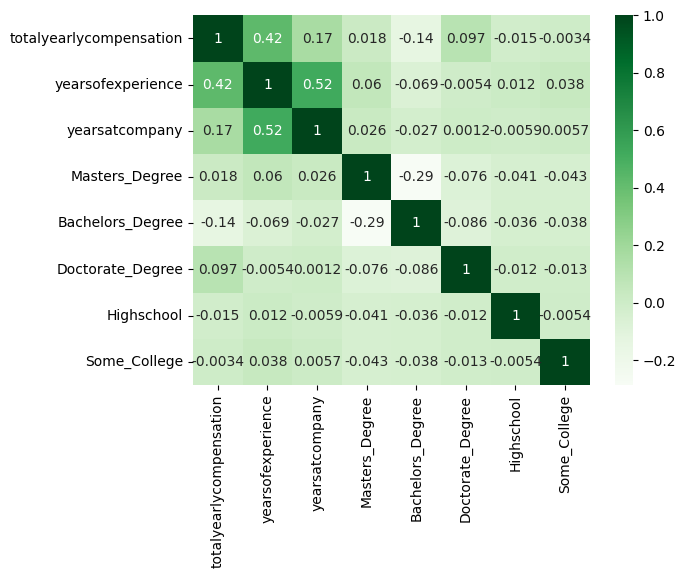

In [13]:
sns.heatmap(corrM, xticklabels=corrM.columns, yticklabels=corrM.columns, cmap="Greens", annot=True)

In [14]:
df.totalyearlycompensation.describe()

count    6.264200e+04
mean     2.163004e+05
std      1.380337e+05
min      1.000000e+04
25%      1.350000e+05
50%      1.880000e+05
75%      2.640000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

In [15]:
newDf=df[["totalyearlycompensation","yearsofexperience","yearsatcompany","Masters_Degree","Bachelors_Degree","Doctorate_Degree","Highschool","Some_College"]]
newDf.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
0,127000,1.5,1.5,0,0,0,0,0
1,100000,5.0,3.0,0,0,0,0,0
2,310000,8.0,0.0,0,0,0,0,0
3,372000,7.0,5.0,0,0,0,0,0
4,157000,5.0,3.0,0,0,0,0,0


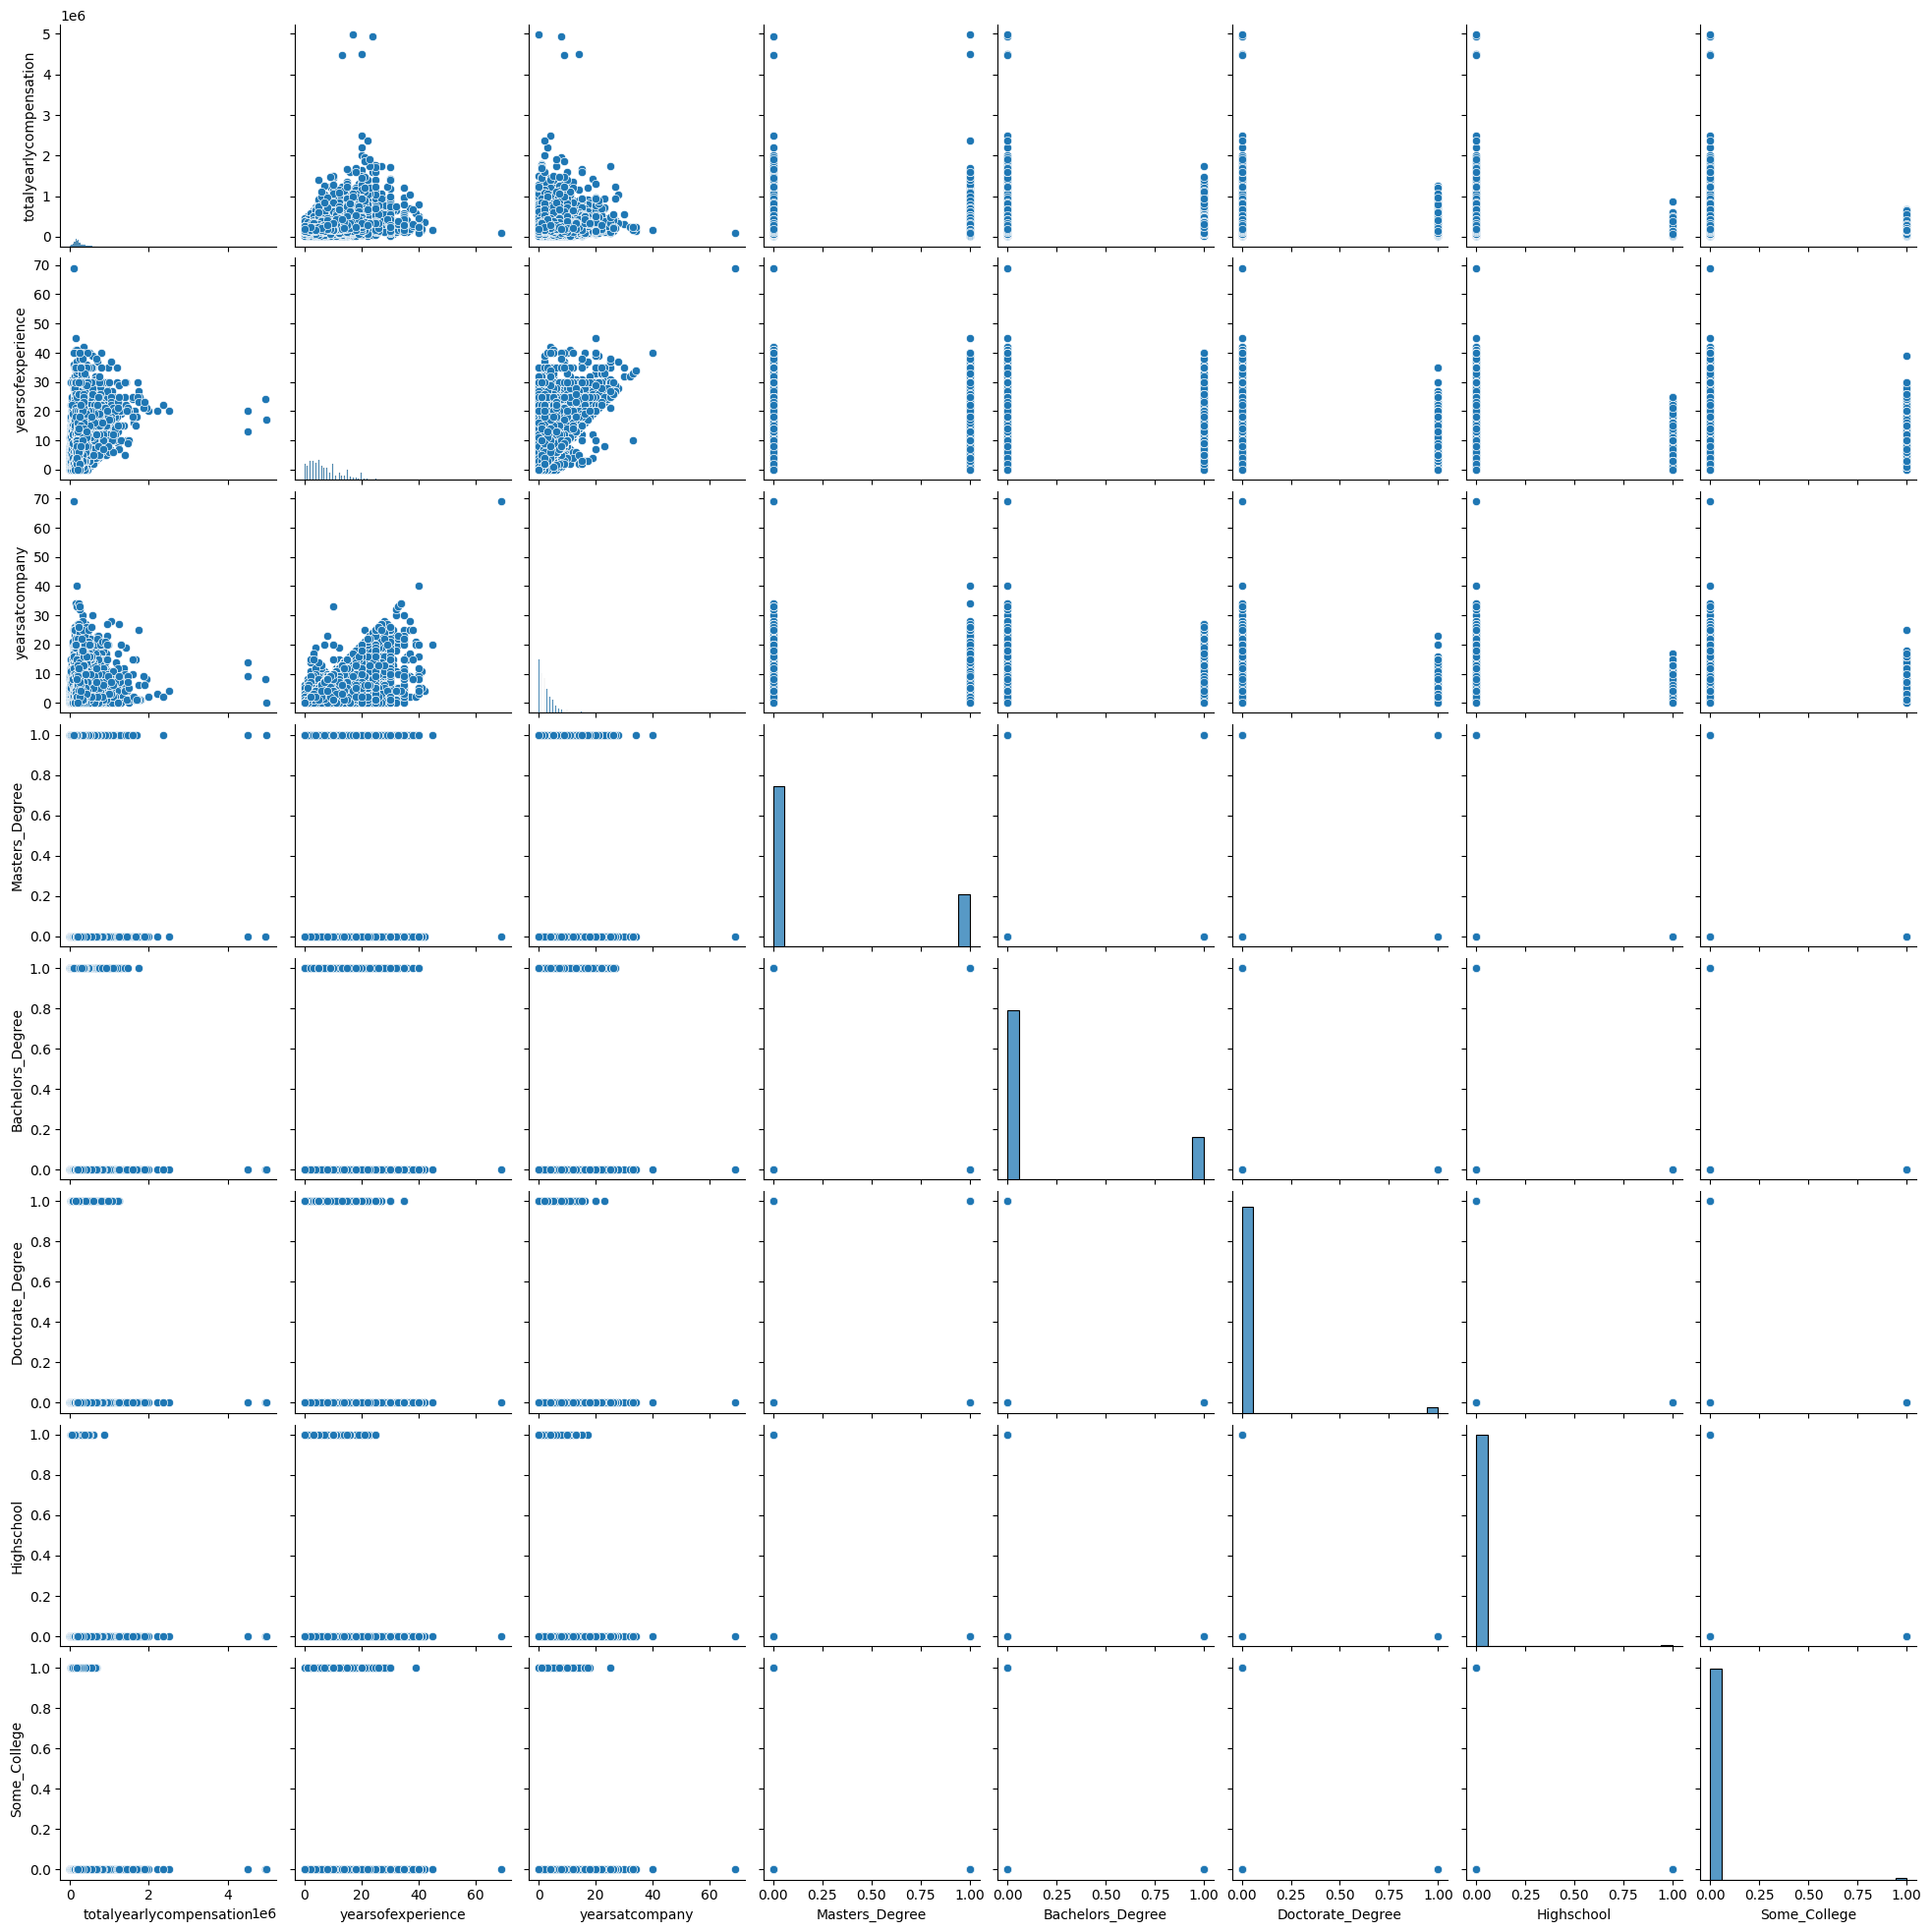

In [16]:
sns.pairplot(newDf)
plt.show()

In [17]:
df.company.value_counts()

Amazon                      8126
Microsoft                   5216
Google                      4330
Facebook                    2990
Apple                       2028
                            ... 
Samsung research America       1
Bny Mellon                     1
yelp                           1
Bloomberg lp                   1
tableau software               1
Name: company, Length: 1631, dtype: int64

In [18]:
df.company.isnull().sum()

5

In [19]:
df.company.fillna("Not Known", axis=0, inplace=True)

In [20]:
df.company.isnull().sum()

0

In [21]:
df["maang"]=df.company.apply(lambda x: 1 if x in ["Meta", "Amazon", "Apple", "Netflix", "Google", "Facebook", "Microsoft"] else 0)

In [22]:
df.maang.value_counts()

0    39684
1    22958
Name: maang, dtype: int64

In [23]:
df.shape

(62642, 30)

In [24]:
newCorr=df[["totalyearlycompensation","maang"]].corr()

In [25]:
newCorr

,totalyearlycompensation,maang
totalyearlycompensation,1.000000,0.220483
maang,0.220483,1.000000


<Axes: >

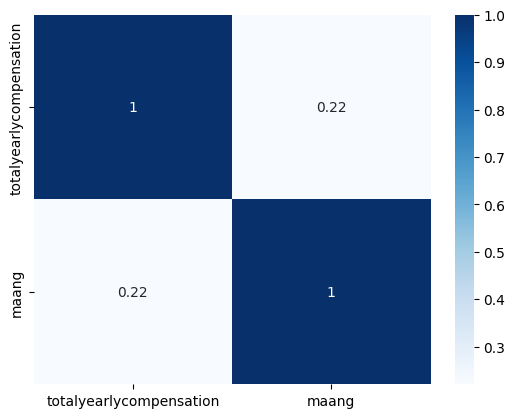

In [26]:
sns.heatmap(newCorr, xticklabels=newCorr.columns, yticklabels=newCorr.columns, cmap="Blues", annot=True)

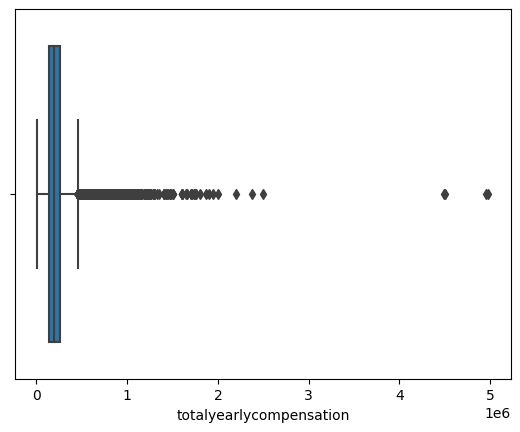

In [27]:
sns.boxplot(x=df["totalyearlycompensation"],data=df)
plt.show()

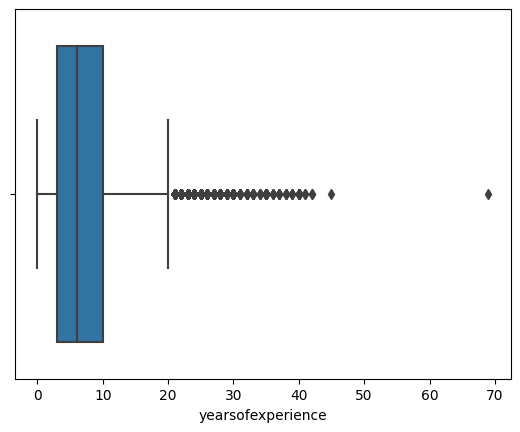

In [28]:
sns.boxplot(x=df["yearsofexperience"],data=df)
plt.show()

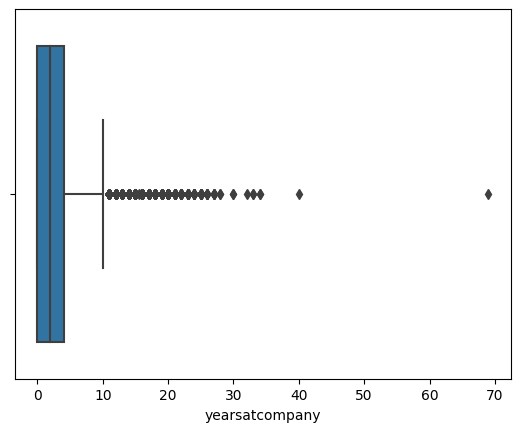

In [29]:
sns.boxplot(x=df["yearsatcompany"],data=df)
plt.show()

In [30]:
def getLimits(data, col):
    lower_range=0
    upper_range=0
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return upper_range, lower_range

In [31]:
upper_range, lower_range=getLimits(df,"totalyearlycompensation")
print(upper_range, lower_range)

457500.0 -58500.0


In [32]:
min_salary=np.min(df.totalyearlycompensation)
min_salary

10000

In [33]:
df.query("`totalyearlycompensation`==" + str(min_salary))

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,maang
5467,4/3/2019 0:20:16,Bukalapak,Designer I,Product Designer,10000,"Jakarta, JK, Indonesia",4.0,1.0,Design Experience,10000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
11003,9/16/2019 23:19:35,Microsoft,SDE I,Software Engineer,10000,"Chennai, TN, India",0.0,1.0,Web Development (Front-End),1000.0,...,0,0,0,0,0,0,0,NaN,NaN,1
12078,10/16/2019 4:51:23,Andela,D2,Software Engineer,10000,"Lagos, LA, Nigeria",2.0,2.0,API Development (Back-End),10000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
12079,10/16/2019 4:55:32,Andela,E3,Software Engineer,10000,"Lagos, LA, Nigeria",2.0,2.0,Full Stack,10000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
12080,10/16/2019 5:07:55,Andela,Junior developer,Software Engineer,10000,"Lagos, LA, Nigeria",2.0,1.0,Web Development (Front-End),8000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
12083,10/16/2019 6:29:05,Andela,2,Software Engineer,10000,"Lagos, LA, Nigeria",2.0,2.0,Full Stack,10000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
12127,10/17/2019 1:59:32,Andela,E1,Software Engineer,10000,"Lagos, LA, Nigeria",5.0,1.0,Full Stack,5000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
12128,10/17/2019 5:25:30,Andela,E2,Software Engineer,10000,"Lagos, LA, Nigeria",7.0,3.0,Full Stack,10000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
13537,11/28/2019 13:47:26,Andela,E1,Software Engineer,10000,"Lagos, LA, Nigeria",5.0,1.0,Full Stack,5000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
15110,1/17/2020 7:30:41,Andela,ENG 1,Software Engineer,10000,"Nairobi, NA, Kenya",3.0,3.5,API Development (Back-End),9000.0,...,0,0,0,0,0,0,0,NaN,NaN,0


In [34]:
max_salary=np.max(df.totalyearlycompensation)
max_salary

4980000

In [35]:
df.query("`totalyearlycompensation`==" + str(max_salary))

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,maang
61991,7/30/2021 22:23:24,Facebook,E9,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,Product,380000.0,...,0,0,1,0,0,0,0,Asian,Master's Degree,1


In [36]:
df.query("`totalyearlycompensation`>" + str(upper_range)).shape

(3133, 30)

In [37]:
ur_yop, lr_yop=getLimits(df,"yearsofexperience")
print(ur_yop, lr_yop)

20.5 -7.5


In [38]:
df.query("`yearsofexperience`>40").shape

(6, 30)

In [39]:
df=df.query("`yearsofexperience`<=" + str(ur_yop))

In [40]:
df.shape

(61203, 30)

In [41]:
ur_yop, lr_yop=getLimits(df,"yearsatcompany")
print(ur_yop, lr_yop)

10.0 -6.0


In [42]:
df=df.query("`yearsatcompany`<=" + str(ur_yop))

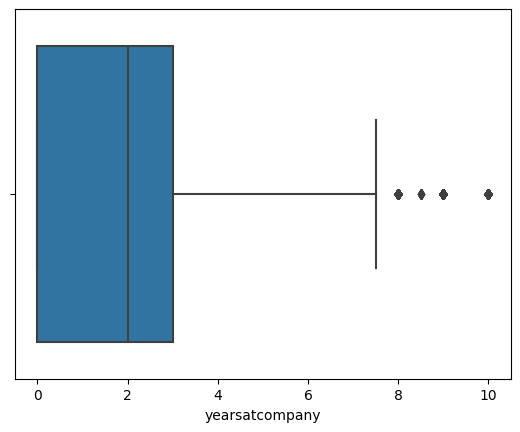

In [43]:
sns.boxplot(x=df["yearsatcompany"],data=df)
plt.show()

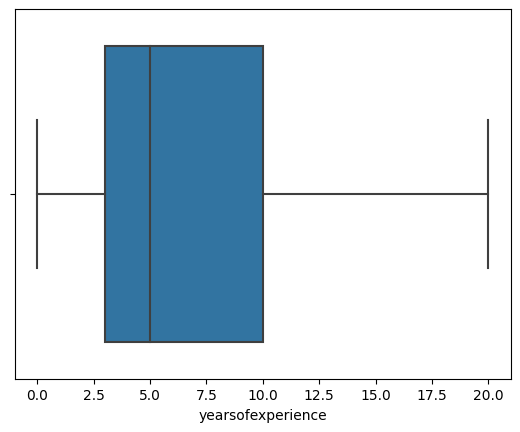

In [44]:
sns.boxplot(x=df["yearsofexperience"],data=df)
plt.show()

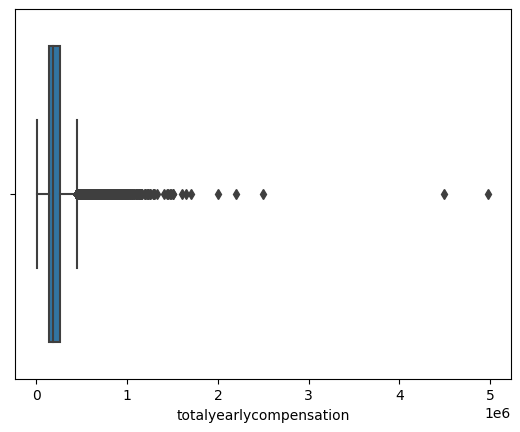

In [45]:
sns.boxplot(x=df["totalyearlycompensation"],data=df)
plt.show()

In [46]:
upper_range, lower_range=getLimits(df,"totalyearlycompensation")
print(upper_range, lower_range)

445500.0 -54500.0


In [47]:
df=df.query("`totalyearlycompensation`<=" + str(upper_range))

In [48]:
df.shape

(56651, 30)

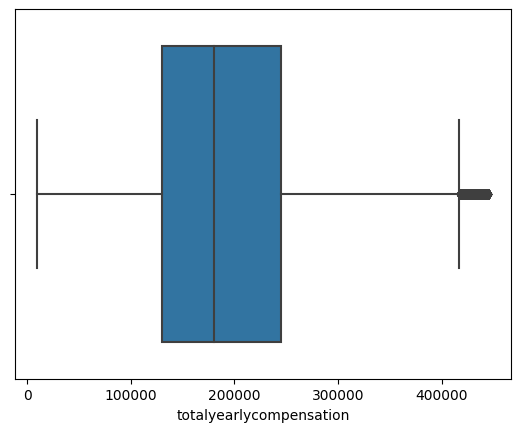

In [49]:
sns.boxplot(x=df["totalyearlycompensation"],data=df)
plt.show()

In [50]:
# pip install scipy
# pip install scikit-learn

In [51]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education',
       'maang'],
      dtype='object')

In [52]:
x=df[['yearsofexperience', 'yearsatcompany','Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'maang']]

In [61]:
y=df['totalyearlycompensation']

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc=StandardScaler()

In [64]:
x=sc.fit_transform(x)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [68]:
x_train.shape

(45320, 13)

In [69]:
x_test.shape

(11331, 13)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lg_model=LogisticRegression()

In [72]:
lg_model.fit(x_train,y_train)

LogisticRegression()

In [79]:
y_pred=lg_model.predict(x_test)

In [80]:
result={"Actual": y_test, "Predicted": y_pred}

In [81]:
pd.DataFrame(result)

,Actual,Predicted
13113,165000,110000
62062,220000,200000
29049,110000,140000
7448,230000,200000
10892,72000,150000
...,...,...
25125,26000,120000
38144,200000,200000
35157,16000,150000
982,200000,200000


In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [83]:
mean_squared_error(y_test,y_pred)

6899389028.549995

In [84]:
accuracy_score(y_test,y_pred)

0.026123025328744155

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
reg_model=LinearRegression()

In [87]:
reg_model.fit(x_train,y_train)

LinearRegression()

In [88]:
result={"Actual": y_test, "Predicted": y_pred}

In [89]:
pd.DataFrame(result)

,Actual,Predicted
13113,165000,110000
62062,220000,200000
29049,110000,140000
7448,230000,200000
10892,72000,150000
...,...,...
25125,26000,120000
38144,200000,200000
35157,16000,150000
982,200000,200000


In [90]:
mean_squared_error(y_test,y_pred)

6899389028.549995

In [91]:
accuracy_score(y_test,y_pred)

0.026123025328744155